In [1]:
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical



In [2]:
data_train = np.loadtxt('mnist_train.csv', delimiter=',').T
data_test = np.loadtxt('mnist_test.csv', delimiter=',').T

# Select a subset of the data (first 10,000 samples)
data_train = data_train[:, :10000]
data_test = data_test[:, :10000]

# Separate features and labels
x_train = data_train[1:, :]  # All rows except the first one (features)
y_train = data_train[0, :]   # First row (labels)

x_test = data_test[1:, :]    # All rows except the first one (features)
y_test = data_test[0, :]     # First row (labels)


# One-hot encode the labels manually
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y.astype(int)] = 1
    return one_hot

num_classes = 10
y_train = one_hot_encode(y_train, num_classes)
y_test = one_hot_encode(y_test, num_classes)


print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (784, 10000)
y_train shape: (10000, 10)
x_test shape: (784, 10000)
y_test shape: (10000, 10)


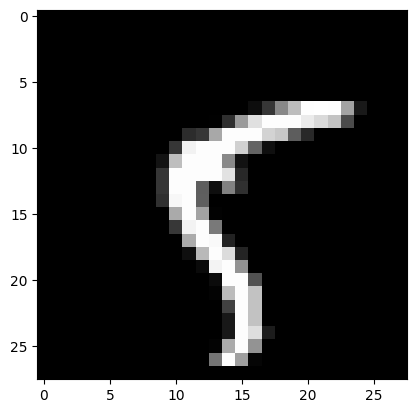

In [3]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28,28), cmap = 'gray')
plt.show()

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
x_train_reshaped = x_train.T.reshape(-1, 28, 28, 1) # Transpose and reshape x_train
x_test_reshaped = x_test.T.reshape(-1, 28, 28, 1)  # Also reshape x_test for validation data


print("Shape of x_train_reshaped:", x_train_reshaped.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test_reshaped:", x_test_reshaped.shape)
print("Shape of y_test:", y_test.shape)

# Ensure data is in float32 format, which is commonly used for neural networks
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

# Normalize pixel values to be between 0 and 1
x_train_reshaped /= 255.0
x_test_reshaped /= 255.0

# Run the model in eager mode for more detailed error messages
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(x_train_reshaped, y_train, epochs=5, batch_size=64,
          validation_data=(x_test_reshaped, y_test))

Shape of x_train_reshaped: (10000, 28, 28, 1)
Shape of y_train: (10000, 10)
Shape of x_test_reshaped: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)
Epoch 1/5
157/157 [==============================] - 23s 147ms/step - loss: 0.5155 - accuracy: 0.8535 - val_loss: 0.1757 - val_accuracy: 0.9501
Epoch 2/5
157/157 [==============================] - 20s 129ms/step - loss: 0.1303 - accuracy: 0.9610 - val_loss: 0.1016 - val_accuracy: 0.9681
Epoch 3/5
157/157 [==============================] - 18s 118ms/step - loss: 0.0863 - accuracy: 0.9744 - val_loss: 0.0760 - val_accuracy: 0.9746
Epoch 4/5
157/157 [==============================] - 20s 127ms/step - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0650 - val_accuracy: 0.9785
Epoch 5/5
157/157 [==============================] - 19s 124ms/step - loss: 0.0468 - accuracy: 0.9864 - val_loss: 0.0686 - val_accuracy: 0.9762


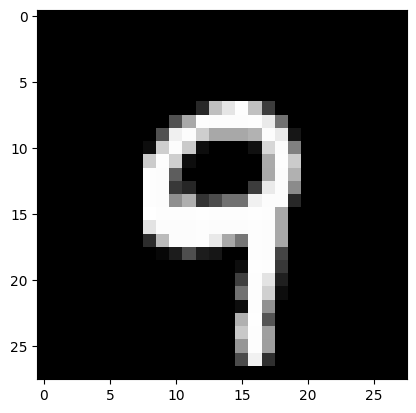

1/1 [==============================] - 0s 23ms/step
Predicted Digit: 9


In [10]:
idx = int(random.randrange(0,x_test.shape[1])) # Select index along the correct axis
image = x_test[:, idx] # Select the image at the random index
plt.imshow(image.reshape((28,28)),cmap='gray')
plt.show()

# Predict the digit
prediction = np.argmax(model.predict(image.reshape(1, 28, 28, 1))) # Reshape the image to match the model's input shape

print("Predicted Digit:", prediction)
